In [68]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.interpolate import interp1d
import seaborn as sns
%matplotlib inline

In [69]:
# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)


In [70]:
def ang(theta, A):
    '''
        Angular distribution formula 
    '''
    return(A * np.cos(theta) * np.cos(theta))

def ang_sin(theta, A):
    '''
        Angular distribution formula 
    '''
    return(A * np.cos(theta) * np.cos(theta) * np.sin(theta))

In [73]:
def generate_angular(dist, limits, N):
    
    # extremes in x direction 
    u1 = limits[0] # minimum of x sampling 
    u2 = limits[1] # maximum of x sampling 

    u = np.random.uniform(u1,u2,5*N)

    lower = 0                                       # accept-reject minimum for each point
    upper = np.max(dist(u,A)) # accept-reject maximum for each point 

    v = np.random.uniform(lower, upper, 5*N)

    # accepted points 
    points = u[v < dist(u,A)]
    # compute acceptance ratio 
    efficiency = len(points) / (5*N)

    # keep only N events if we have more 
    if len(points) >= N:
        points = points[:N]
    else:
        print('The wanted number of events is %1.0f'% N )
        print('The number of generated events is %1.0f' % len(points))

    return points, efficiency 


Efficiency: 50 %


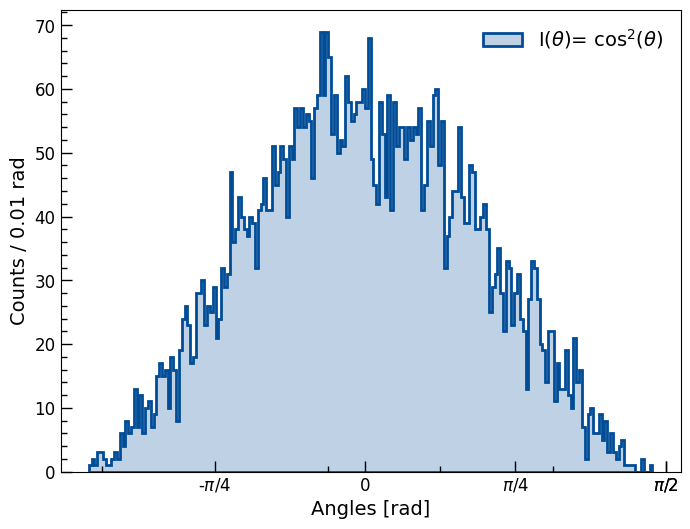

In [74]:
A = 1.
N = 6066

thetas, eff = generate_angular(ang,(-0.5*np.pi,0.5*np.pi), N)

print('\nEfficiency: {:1.0f} %'.format(eff*100))

fig, ax = plt.subplots(figsize=(8,6))
n, bins , _ = ax.hist(thetas, bins=200, histtype='stepfilled',fc='#BFD2E5', ec = '#004C97', lw=2, alpha=1, label="I$(\\theta$)= $\\cos^2(\\theta)$")

bin_width = bins[1] - bins[0]

# ticks
ax.set_xticks([-np.pi/4, np.pi/2, 0,np.pi/4,np.pi/2],['-$\pi/4$','-$\pi/2$','0','$\pi/4$','$\pi/2$'])
ax.tick_params(which='major', right=False, width=1.0, length=8, direction='in', labelsize=12)
ax.tick_params(which='minor', right=False, width=1.0, length=4, direction='in', labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.25))
ax.minorticks_on()

# labels
ax.set_xlabel('Angles [rad]', fontsize=14)
ax.set_ylabel('Counts / %1.2f rad' % bin_width, fontsize=14)


# legend
ax.legend(loc='best', frameon=False, fontsize=14)

fig.savefig("plots/cos2.pdf", dpi = 200)
plt.show()

In [76]:
x0 = np.random.uniform(0,182, size = N)

def generate_x(x0, theta, N, h=8.):


    x_ = x0 - (h/np.cos(theta)) * np.sin(theta)

    x_select = np.logical_and(x_ >= 0, x_ <= 182)
    x = x_[x_select]

    n_coincidences = 100 * len(x)/N 

    return x_, x,n_coincidences


In [77]:
x_all, x, n2 = generate_x(x0,thetas, N)
x_all_3, x, n3 = generate_x(x0,thetas, N, 16.)
x_all_4, x, n4 = generate_x(x0,thetas, N, 24.)
x_all_5, x, n5 = generate_x(x0,thetas, N, 32.)


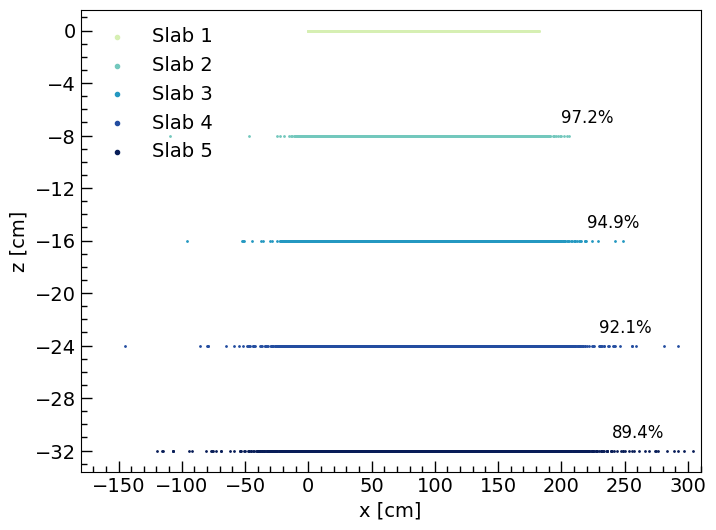

In [78]:
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)

# Data for a three-dimensional line
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)
z2 = [-16.] * len(x_all_3)
z3 = [-24.] * len(x_all_4)
z4 = [-32.] * len(x_all_5)

fig, ax = plt.subplots(figsize=(8,6))

cmap = mpl.cm.get_cmap('YlGnBu',6)

ax.scatter(x0, z0, color=cmap(1),   marker = '.', s=4, label = 'Slab 1')
ax.scatter(x_all, z1, color=cmap(2),  marker = '.', s=4, label = 'Slab 2')
ax.scatter(x_all_3, z2, color=cmap(3), marker = '.', s=4, label = 'Slab 3')
ax.scatter(x_all_4, z3, color=cmap(4), marker = '.', s=4, label = 'Slab 4')
ax.scatter(x_all_5, z4, color=cmap(5),  marker = '.', s=4, label = 'Slab 5')

ax.text(200,z1[0]+1, '%1.1f'%n2 + '%', fontsize = 12)
ax.text(220,z2[0]+1, '%1.1f'%n3 + '%', fontsize = 12)
ax.text(230,z3[0]+1, '%1.1f'%n4 + '%', fontsize = 12)
ax.text(240,z4[0]+1, '%1.1f'%n5 + '%', fontsize = 12)

# ticks
set_ticks(ax,50,4)
# labels
ax.set_xlabel('x [cm]', fontsize=14)
ax.set_ylabel('z [cm]' , fontsize=14)
ax.set_xlim(-180,310)
# legend
ax.legend(loc='best', frameon=False, fontsize=14, markerscale = 3)

fig.savefig("plots/1d_sim_slabs.png", dpi = 200)
plt.show()


In [79]:
str(n2)

'97.24695021430927'

In [81]:
print('coincidences between 1st and 2nd slab (1D) is %1.1f per cent'%n2)

coincidences between 1st and 2nd slab (1D) is 97.2 per cent


In [83]:
x0 = np.random.uniform(0,182, size = N)
y0 = np.random.uniform(0,20, size = N)
phi = np.random.uniform(0,2*np.pi, size = N)

def generate_xy(theta, x0,y0,phi,N, h=8.):
    
    x_ = x0 - (h/np.cos(theta)) * np.sin(theta)*np.cos(phi)
    y_ = y0 - (h/np.cos(theta)) * np.sin(theta)*np.sin(phi)


    y_select =  np.logical_and(y_ > 0, y_ < 20)
    x_select = np.logical_and(x_ > 0, x_ < 182)
    mask = np.logical_and(x_select,y_select)

    x = x_[mask]
    y = y_[mask]

    n_coincidences = 100 * len(x)/N 

    return x_,y_, x,y, n_coincidences



Efficiency: 55 %


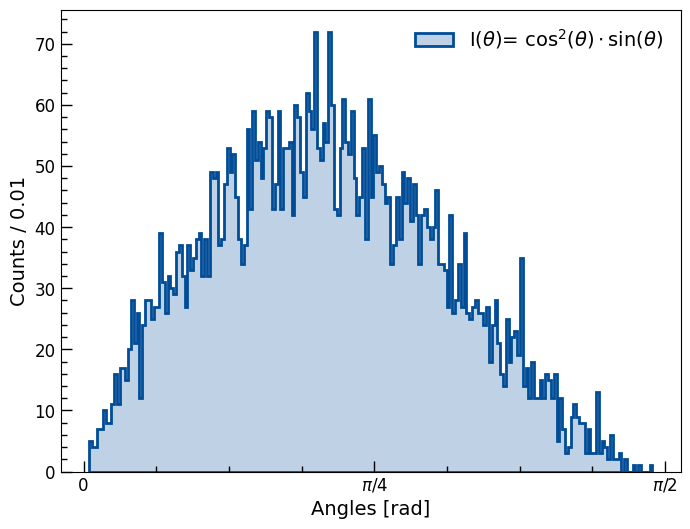

In [84]:
A = 1.

N = 6066

thetas, eff = generate_angular(ang_sin,(0.,0.5*np.pi), N)

print('\nEfficiency: {:1.0f} %'.format(eff*100))

fig, ax = plt.subplots(figsize=(8,6))
n, bins , _ = ax.hist(thetas, bins=200, histtype='stepfilled',fc='#BFD2E5', ec = '#004C97', lw=2, alpha=1, label="I$(\\theta$)= $\\cos^2(\\theta) \cdot \\sin(\\theta)$")


bin_width = bins[1] - bins[0]

# ticks
ax.set_xticks([0,np.pi/4,np.pi/2],['0','$\pi/4$','$\pi/2$'])
ax.tick_params(which='major', right=False, width=1.0, length=8, direction='in', labelsize=12)
ax.tick_params(which='minor', right=False, width=1.0, length=4, direction='in', labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.25))
ax.minorticks_on()

# labels
ax.set_xlabel('Angles [rad]', fontsize=14)
ax.set_ylabel('Counts / %1.2f' % bin_width, fontsize=14)


# legend
ax.legend(loc='best', frameon=False, fontsize=14)

#fig.savefig("plots/cos2sin.pdf", dpi = 200)
plt.show()

In [85]:
x_all,y_all,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi, N)

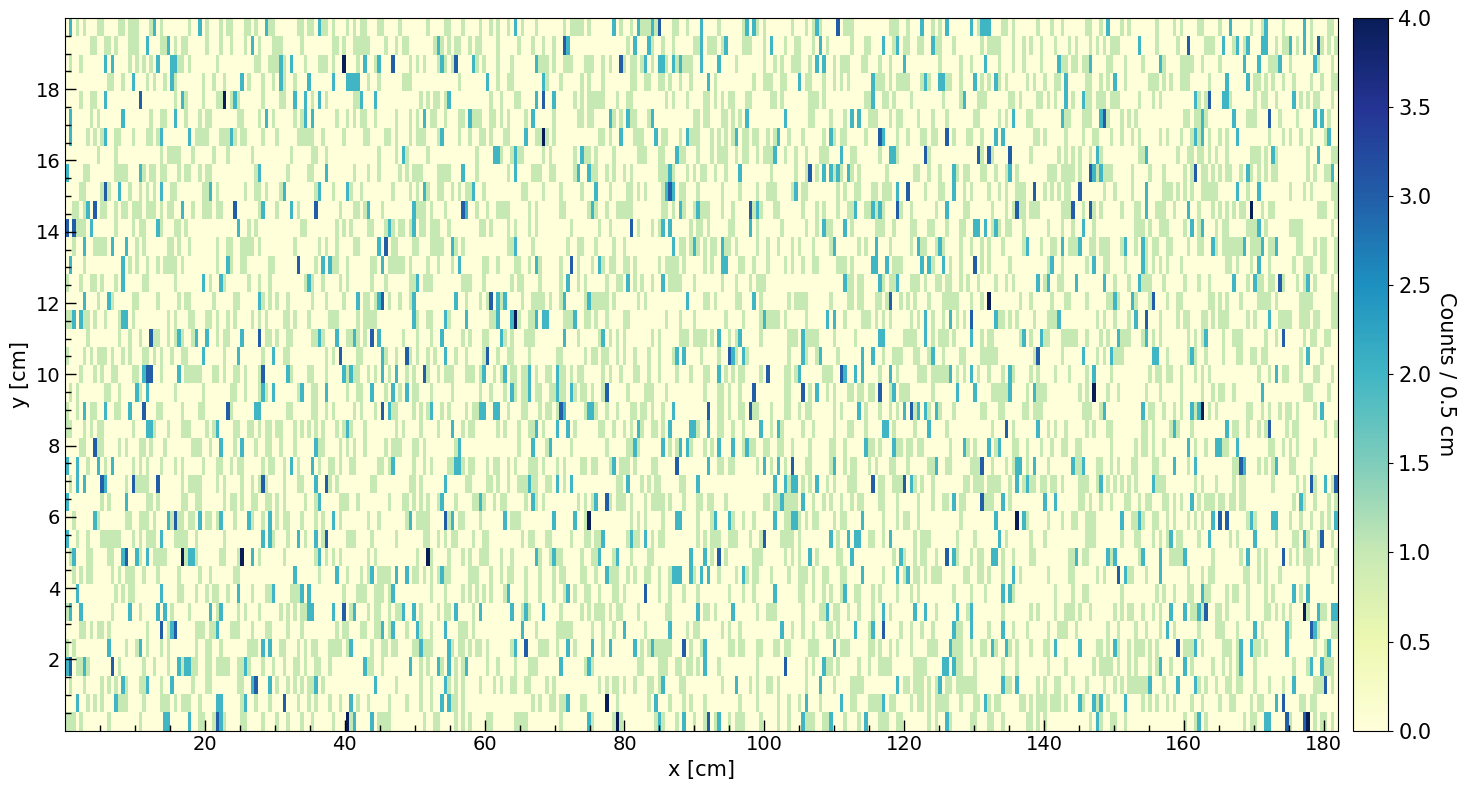

In [86]:
fig, ax = plt.subplots(figsize=(16,8))

binwidth = 0.50      # [cm]
nbinsx = int((np.max(x0) - np.min(x0))/binwidth)
nbinsy = int((np.max(y0) - np.min(y0))/binwidth)

h, binx, biny, im = ax.hist2d(x0,y0, bins=[nbinsx,nbinsy], cmap='YlGnBu', density = False )

# ticks
set_ticks(ax,20,2)
# labels
ax.set_xlabel('x [cm]', fontsize=15)
ax.set_ylabel('y [cm]' , fontsize=15)

clb = fig.colorbar(im, ax=ax, pad = 0.01)

clb.ax.tick_params(labelsize=8) 
clb.ax.set_ylabel('Counts / %1.1f cm'% binwidth, fontsize = 15,rotation=270,labelpad=18)
clb.ax.tick_params(labelsize = 15)

fig.tight_layout()
fig.savefig("plots/xy_uniform.png", dpi = 400)
plt.show()

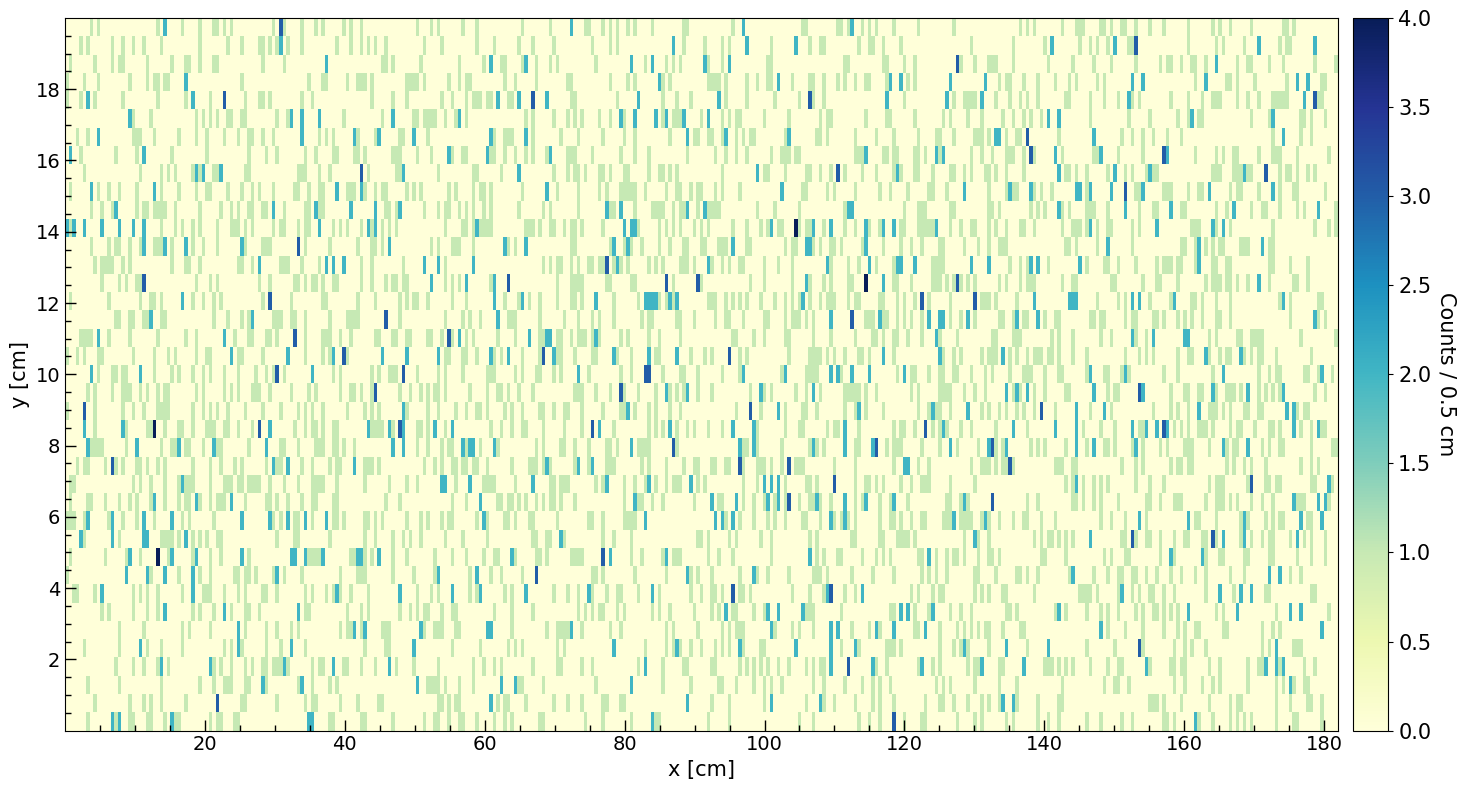

In [87]:
fig, ax = plt.subplots(figsize=(16,8))

binwidth = 0.5      # [cm]
nbinsx = int((np.max(x_coinc) - np.min(x_coinc))/binwidth)
nbinsy = int((np.max(y_coinc) - np.min(y_coinc))/binwidth)

h, binx, biny, im = ax.hist2d(x_coinc,y_coinc, bins=[nbinsx,nbinsy], cmap='YlGnBu', density = False)


# ticks
set_ticks(ax,20,2)
# labels
ax.set_xlabel('x [cm]', fontsize=15)
ax.set_ylabel('y [cm]' , fontsize=15)

clb = fig.colorbar(im, ax=ax, pad = 0.01)

clb.ax.tick_params(labelsize=8) 
clb.ax.set_ylabel('Counts / %1.1f cm'% binwidth, fontsize = 15,rotation=270,labelpad=18)
clb.ax.tick_params(labelsize = 15)

fig.tight_layout()
fig.savefig("plots/xy_slab2.png", dpi = 400)
plt.show()


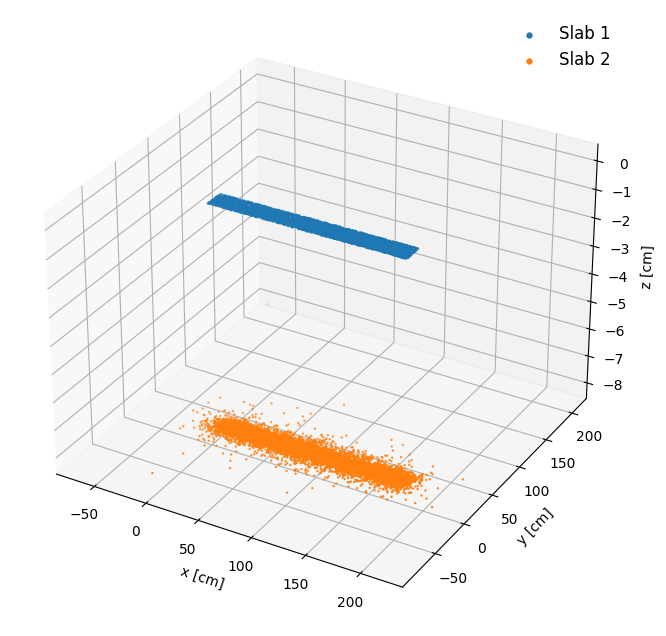

In [88]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

# Data for a three-dimensional line
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)
z_coinc = [-8.] * len(x_coinc)

ax.scatter(x0, y0, z0, cmap='jet', marker = '.', s = 2, label = 'Slab 1')
ax.scatter(x_all, y_all, z1, cmap='jet', marker = '.', s = 2, label = 'Slab 2')

#ax.scatter(x_coinc, y_coinc, z_coinc, cmap='jet', marker = '.', s = 2, label = 'Coincidences S1/S2')


ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")

ax.legend(loc='best', frameon=False, fontsize=12, markerscale=5)

plt.show()


In [89]:
print('coincidences between 1st and 2nd slab (2D) is %1.1f per cent'%coinc)

coincidences between 1st and 2nd slab (2D) is 74.2 per cent


In [90]:
coinc/10000 * N

45.03

In [92]:
x_all_3,y_all_3,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi, N, 16.)
x_all_4,y_all_4,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi,N, 24.)
x_all_5,y_all_5,x_coinc,y_coinc, coinc= generate_xy(thetas,x0,y0,phi,N, 32.)

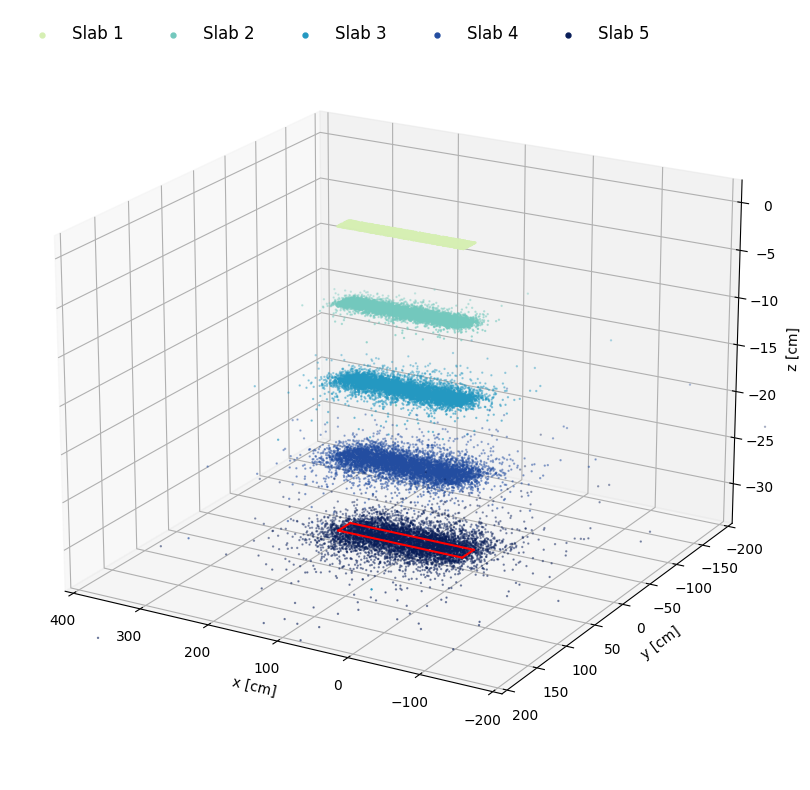

In [96]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

cmap = mpl.cm.get_cmap('YlGnBu',6)

# Data for a three-dimensional line
z0 = [0] * len(x0)
z1 = [-8.] * len(x_all)
z2 = [-16.] * len(x_all_3)
z3 = [-24.] * len(x_all_4)
z4 = [-32.] * len(x_all_5)

ax.scatter(x0, y0, z0, color=cmap(1),   marker = '.', s = 2, label = 'Slab 1')
ax.scatter(x_all, y_all, z1, color=cmap(2),  marker = '.', s = 2, label = 'Slab 2')
ax.scatter(x_all_3, y_all_3, z2, color=cmap(3), marker = '.', s = 2, label = 'Slab 3')
ax.scatter(x_all_4, y_all_4, z3, color=cmap(4), marker = '.', s = 2, label = 'Slab 4')
ax.scatter(x_all_5, y_all_5, z4, color=cmap(5),  marker = '.', s = 2, label = 'Slab 5')

ax.set_xlim(-200,400)
ax.set_ylim(-200,200)

ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")

ax.legend(loc='upper left', frameon=False, fontsize=12, markerscale=5, ncol=5)

x = [0,182]
y = [20,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,182]
y = [0,0]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [0,0]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)

x = [182,182]
y = [0,20]
z = [-32,-32]
ax.plot(x,y,z, c = 'red', zorder = 1000)


fig.savefig("plots/2dslabs.png", dpi = 400)
ax.view_init(20, 120)
plt.show()
